<h1><center>Stochastic Volterra-Lotka model</center></h1>

# Description


<h1><center>Basic Volterra-Lotka Model</center></h1>
The basic Volterra-Lotka model describes the relationships between populations. In its original version, it represented the relationship between the quantities of rabbits and foxes. The model was described by a system of two differential equations:
\begin{equation*}
\begin{cases}
x' = ax - bxy\
y' = dxy - cy,
\end{cases}
\end{equation*}
where $x$ represents the population of rabbits, $y$ represents the population of foxes, and the coefficients $a$, $b$, $c$, and $d$ are positive real numbers representing the interactions.

While the model has been successful in mathematics as an example of a differential equation and has been the subject of many studies in this field, it has proven to be inadequate for practical applications. The main drawbacks of the model are:

1. Simplicity - the model only predicts basic relationships between species, whereas in practice, population size depends on many factors that are often difficult to describe using formulas.
2. Generality - the model assumes that the functions $x$ and $y$ maintain the same pattern throughout the domain. However, it is possible, for example, that a population will decrease almost to zero and then increase again after some time. In practice, such a situation would imply the extinction of a species.
<h1><center>Generalized Stochastic Volterra-Lotka Model</center></h1>

This project presents a stochastic Volterra-Lotka model generalized to the $n$-dimensional case, aiming to address the first of the mentioned problems. A modification will also be added to partially address the second problem.

Let $\textbf{X} = {X_1, X_2, ..., X_d}$ be a vector representing the populations of species 1, 2, ..., $d$. The stochastic Volterra-Lotka model assumes that the time-dependent relationship of population sizes for each species can be described by the following stochastic differential equation:
$$dX_i(t) = X_i(t)f_i(\textbf{X}(t)) dt  + X_i(t) dW_i(t), \quad i=1,2,...,d,$$

where $dW_i(t)$ are (uncorrelated) increments of Wiener processes with mean $0$ and variance $\sigma_i^2$. By adding the stochastic component to the equation, we take into account other factors influencing the population in some way.

In most cases, it is assumed that the functions $f_i$ are affine. The functions $f_i$ can be expressed using the interaction matrix $\textbf{A} = {a_{ij}}$:
$$f(\textbf{X}(t)) = \textbf{A}\textbf{X} + \textbf{q}$$
where $\textbf{q}$ is a $d$-dimensional vector.

The matrix $\textbf{A}$ is easy to interpret: the element $a_{i,j}$ informs us about the influence of species $j$ on species $i$. For example, if $a_{5,2}$ is a negative number, the increase in the population of species 2 will have a negative impact on the population size of species 5. The elements on the diagonal represent the coefficients of intraspecific competition (often assumed as $a_{i,i} = 0$).


<h1><center>Considered case</center></h1>

In this project, a special case of such a system is implemented, representing a food chain. The interaction matrix is then tridiagonal, and the system of differential equations can be written as follows:
\begin{equation*}
\begin{cases}
dX_1(t) &= X_1(t)\Big(a_{1,1}X_1(t) + a_{1,2}X_2(t) + q_1\Big)dt + X_1dW_1(t)\
&\vdots\
dX_i(t) &= X_i(t)\Big(a_{i,i-1}X_{i-1}(t) + a_{i,i}X_i(t) + a_{i,i+1}X_{i+1}(t) + q_i\Big)dt + X_idW_i(t)\
&\vdots\
dX_d(t) &= X_d(t)\Big(a_{d,d-1}X_{d-1}(t) + a_{d,d}X_d(t) + q_d\Big)dt + X_d dW_d(t)
\end{cases}
\end{equation*}

Species $i$:

1. has a natural growth/mortality rate $q_i$,
2. feeds on species $i-1$ with an interaction coefficient $a_{i,i-1}$,
3. competes within its own species with a coefficient $a_{i,i}$,
4. serves as prey for species $i+1$ with an interaction coefficient $a_{i,i+1}$.

Species $1$ usually represents vegetation, characterized by a positive growth ($q_1 > 0$) and the absence of a predator (lack of the first term $a_{i,i-1}$).

Species $d$ represents the top of the food chain and is not preyed upon by any other species (lack of the last term $a_{i,i+1}$).

<h1><center>Milstein Scheme</center></h1>
To use the multidimensional Milstein scheme, we need to ensure that the commutation condition is satisfied.

We present the discussed stochastic differential equation in the form:
$$d\textbf{X}(t) = a(t, \textbf{X}(t)) dt + b(t,\textbf{X}(t)) d\textbf{W}(t)$$
In our case, the matrix $b(t,\textbf{X}(t)) = [b^{i,j}(t,\textbf{X}(t))] =[b^j]$ is a diagonal matrix with the diagonal elements $b^{i,i} = X_i(t)$, i.e., $b^j$ has only one nonzero coordinate at position $j$:
\begin{equation}
b^j = \begin{bmatrix}
0\\ \vdots\\0\\X_j\\ 0 \\ \vdots\\ 0
\end{bmatrix}
\end{equation}
Let's check if the commutation assumption is satisfied:
$$L_ib^j = L_jb^i.$$
 .
From the definition of the operator $L_i$, we have:
$$L_ib^j = \nabla_xb^i \cdot b^j$$
 
The matrix $\nabla_xb^i$ is a matrix consisting of only zeros except for the $i,i$ position, where it is equal to $1$. For $i\ne j$, we have:
$$L_ib^j = \textbf{0},$$
and for $i=j$,
$$L_ib^i = b^i.$$

The commutation condition is satisfied, so we can use the multidimensional Milstein scheme.

$$\textbf{X}(t_{i+1}) = \textbf{X}(t_i) + a(t_i, \textbf{X}(t_i))\Delta t_i + b(t_i, \textbf{X}(t_i))\Delta \textbf{W}_i + \cfrac{1}{2} \sum_{j_1,j_2 = 1}^n L_{j_1}b^{j_2}(t_i, \textbf{X}(t_i))\left(I_{t_i, t_{i+1}}(W_{j_1},W_{j_2}) + I_{t_i, t_{i+1}}(W_{j_2},W_{j_1})\right)$$
In our case, we have
$$\textbf{X}(t_{i+1}) = \textbf{X}(t_i) + a(t_i, \textbf{X}(t_i))\Delta t_i + b(t_i, \textbf{X}(t_i))\Delta \textbf{W}_i +  \sum_{j_1}^n b^{j_1}\cdot I_{t_i, t_{i+1}}(W_{j_1},W_{j_1})$$

$$\textbf{X}(t_{i+1}) = \textbf{X}(t_i) + a(t_i, \textbf{X}(t_i))\Delta t_i + b(t_i, \textbf{X}(t_i))\Delta \textbf{W}_i +  \sum_{j}^n b^{j}\cdot\left((\Delta W^{j}_i)^2 - \Delta t_i\right)$$

Therefore, in our case, the Milstein scheme looks as follows:
\begin{equation*}
\begin{cases}
X_1(t_{i+1}) &= X_j(t_i)\Big(a_{1,1}X_1(t_i) + a_{1,2}X_{2}(t_i) + q_1\Big)\cdot h + X_1 (t_i) \Delta W_1  + X_{1}(t_i)\cdot \left((\Delta W_{1})^2 - h\right)\\
&\vdots\\
X_j(t_{i+1}) &= X_j(t_i)\Big(a_{j,j-1}X_{j-1}(t_i) + a_{j,j}X_j(t_i) + a_{j,j+1}X_{j+1}(t_i) + q_j\Big)\cdot h + X_j (t_i) \Delta W_j  + X_{j}(t_i)\cdot \left((\Delta W_{j})^2 - h\right)\\
&\vdots\\
X_d(t_{i+1}) &= X_d(t_i)\Big(a_{d,d-1}X_{d-1}(t_i) + a_{d,d}X_d(t_i) + q_d\Big)\cdot h + X_d (t_i) \Delta W_n  + X_{d}(t_i)\cdot \left((\Delta W_{d})^2 - h\right)  
\end{cases}
\end{equation*}

# Implementation

The code utilizes the cupy library and a graphics card to accelerate computations. Before starting, make sure that the environment has GPU access enabled.

Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU

All methods of the class will be presented in examples - there is no need to familiarize yourself with the implementation code at this moment.

In [ ]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.stats import t as ts
from matplotlib import animation, rc

In [ ]:
class Volterra_Lotka:

  def __init__(self, no_species, T, x0, mu, sig, natural_growth, is_eaten, contests, eats):
    self.no_species = no_species
    self.mu = mu
    self.sig = sig
    self.x0 = x0
    self.natural_growth = natural_growth
    self.is_eaten = is_eaten
    self.contests = contests
    self.eats = eats
    self.T = T
    self.extinction = False

  def enable_extinction(self, thresholds, coef):
    self.extinction = True
    self.thresholds = thresholds
    self.coef = coef
  
  def disable_extinction(self):
    self.extinction = False

  def generate_increments(self, N):
    h = self.T / N
    self.N = N
    if np.max(self.sig) == 0:
      self.increments = cp.zeros((N,self.no_species))
    else:
      self.increments = cp.random.multivariate_normal(self.mu*h, h*self.sig, N)

  def solve(self, scheme, n, results = 'save', new_increments = False, x0 = None):
    if ((scheme != 'Euler') and (scheme != 'Milstein')):
      print('scheme not implemented')
    step_size = self.N / n
    h = self.T/n
    if x0 != None:
      X = cp.array([x0])
    else:
      X = cp.array([self.x0])
    t = np.linspace(0, self.T, n+1)
    no = self.no_species-1

    if self.extinction:
      decrease = cp.array(self.coef)**h

    for i in range(n):
      step = cp.array([])
      if new_increments:
        increments = cp.random.multivariate_normal(self.mu*h, h*self.sig, 1)[0]
      else:
        increments = cp.sum(self.increments[i*step_size : (i+1)*step_size], 0)
      # print(increments)
      X1 = X[i][0] + X[i][0]*(self.natural_growth[0] + self.contests[0]*X[i][0] + self.is_eaten[0]*X[i][1])*h  + X[i][0]*increments[0]
      if scheme == 'Milstein':
        X1 +=  X[i][0]*(increments[0]**2 - h)
      if self.extinction:
        if X[i][0] < self.thresholds[0]:
          X1 = X[i][0] / decrease[0]
      step = cp.append(step, X1)
      for j in range(1, no):
        temp = X[i][j] + X[i][j]*(self.natural_growth[j] + self.eats[j]*X[i][j-1] + self.contests[j]*X[i][j] + self.is_eaten[j]*X[i][j+1])*h  + X[i][j] * increments[j]
        if scheme == 'Milstein':
          temp +=  X[i][j]*(increments[0]**2 - h)
        if self.extinction:
          if X[i][j] < self.thresholds[j]:
            temp = X[i][0] / decrease[no]
        step = cp.append(step, temp)
      XN = X[i][no] + X[i][no]*(self.natural_growth[no] + self.contests[no]*X[i][no] + self.eats[no]*X[i][no-1])*h  + X[i][no] * increments[no]
      if scheme == 'Milstein':
        temp +=  X[i][no]*(increments[0]**2 - h)
      if self.extinction:
        if X[i][no] < self.thresholds[no]:
          XN = X1 = X[i][no] / decrease[no]
      step = cp.append(step, XN)
      X = cp.append(X, [step], 0)
    if results == 'save':
      self.t = t
      self.X = X
    if results == 'return':
      return t, X

  def plot(self):
    plt.figure(figsize = (12,10))
    for i in range(self.no_species):
      plt.plot(self.t, self.X[:,i].get(), label = 'species {}'.format(i))
    plt.legend()
    plt.grid()
  
  def test_versus_dense_grid(self, scheme, n, k, plot = True, error_kpi = 'last'):
    t_ref, X_ref = self.solve(scheme, n*k, 'return')
    t_test, X_test = self.solve(scheme, n, 'return')
    for i in range(self.no_species):
      plt.figure(figsize = (8,6))
      if error_kpi == 'last':
        plt.title('species: {} - last error: {}'.format(i, cp.abs(X_ref[-1][i]-X_test[-1][i])))
      if error_kpi == 'mean':
        plt.title('species: {} -  mean error: {}'.format(i, cp.sqrt(cp.mean((cp.power(X_ref[:,i]-X_test[:,i], 2))))))
      if error_kpi == 'both':
        plt.title('species: {} - last error: {}\n mean error: {}'.format(i, cp.abs(X_ref[-1][i]-X_test[-1][i]), cp.sqrt(cp.mean((cp.power(X_ref[::k,i]-X_test[:,i], 2))))))
      plt.plot(t_ref, X_ref[:,i].get(), label = 'ref')
      plt.plot(t_test, X_test[:,i].get(), label = 'test')
      plt.legend()
      plt.grid()

  def monte_carlo(self, scheme, n, trials, alpha = 0.95, plot = True):
    Xm = cp.ndarray((trials, n+1, self.no_species))
    tt = cp.abs(ts.ppf((1-alpha)/2, trials-1))
    for i in range(trials):
      t, X = self.solve(scheme, n, 'return', new_increments=True)
      Xm[i] =  X
    means = cp.mean(Xm, 0)
    stds = cp.std(Xm, 0)
    if plot:
      plt.figure(figsize = (12,10))
      for i in range(self.no_species):
        plt.plot(t, means[:,i].get(), label = 'species {}'.format(i))
        plt.fill_between(t, (means[:,i] - stds[:,i]*tt/cp.sqrt(trials)).get(), (means[:,i] + stds[:,i]*tt/cp.sqrt(trials)).get(), alpha = 0.3)
      plt.legend()
      plt.grid()
    return Xm

  def set_params(self, params):
    if 'x0' in params.keys():
      self.x0 = params['x0']
    if 'mu' in params.keys():
      self.mu = params['mu']
    if 'sig' in params.keys():
      self.sig = params['sig']
    if 'natural_growth' in params.keys():
      self.natural_growth = params['natural_growth']
    if 'eats' in params.keys():
      self.eats = params['eats']
    if 'contests' in params.keys():
      self.contests = params['contests']
    if 'is_eaten' in params.keys():
      self.is_eaten = params['is_eaten']
    if 'contests' in params.keys():
      self.contests = params['contests']
    if 'extinction' in params.keys():
      self.extinction = params['extinction']


  def check_survivability(self, scheme, n, trials, x1 = None, verbose = True):
    succeses = [0]*self.no_species
    for i in range(trials):
      t, X = self.solve(scheme, n, 'return', new_increments=True, x0=x1)
      # print(X[-1])
      for j in range(self.no_species):
        if X[-1][j] > self.thresholds[j]:
          succeses[j] += 1
    if verbose:
      for i in range(self.no_species):
          print("sepcies {} survived {}% of times ({} out of {} trials)".format(i, succeses[i]/trials*100, succeses[i], trials))
    return np.array(succeses)/trials

  def find_params(self, scheme, n, start, stop, div, min, max, trials):
    choice = np.linspace(start, stop, div)
    for i in range(trials):
      d = {}
      d['natural_growth'] = [-np.random.choice(choice) for i in range(self.no_species)]
      d['eats'] = [np.random.choice(choice) for i in range(self.no_species)]
      d['contests'] = [-np.random.choice(choice) for i in range(self.no_species)]
      d['is_eaten'] = [-np.random.choice(choice) for i in range(self.no_species)]
      d['natural_growth'][0] = -d['natural_growth'][0]
      d['eats'][0] = 0
      d['is_eaten'][-1] = 0

      self.set_params(d)
      t, X = self.solve(scheme, n, 'return')
      last = X[-1]
      maxes = cp.max(X,0)
      if ((last>min).all() & (maxes<max).all()):
        print('found {}'.format(d))
        print('last {}, max: {}'.format(last, maxes))



  def animation(self, scheme, n, multiplier, frames):
    '''
    Creates animation showing chnage in populations over time
    '''
    te, Xe = self.solve(scheme, n, 'return')
    slicer = int(n/frames)
    Xe = cp.round(Xe[::slicer]*multiplier)
    xpos = cp.random.uniform(0,1, (int(cp.max(Xe).item()), self.no_species))
    ypos = cp.random.uniform(0,1, (int(cp.max(Xe).item()), self.no_species))
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.close()
    
    ax.set_xlim( -0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    scatters = []
    for i in range(self.no_species):
      scatter, = ax.plot([], [], 'o', label = 'species: {}'.format(i))
      scatters.append(scatter)

    def init():
      for i in range(self.no_species):
        scatters[i].set_data(xpos[:Xe[0,i],i].get(), ypos[:Xe[0,i],i].get())      
      return (scatters[0],)

    def animate(j):
      title = ''
      for i in range(self.no_species):
        scatters[i].set_data(xpos[:Xe[j,i],i].get(), ypos[:Xe[j,i],i].get())
        title += 'species {}: {} \n'.format(i, Xe[j,i])
      ax.set_title(title)
      ax.legend()
      return (scatters[0],)

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=frames, interval=500, blit=True)

    rc('animation', html='jshtml')
    return anim


# Examples

We will present 2 examples of systems of equations - one in 2D and the other in 3D. The first example will be solved using the Euler-Maruyama method, while the second one will be solved using the Milstein scheme.

### 2D example



We start by initializing the class:



In [ ]:
no_species = 2                 # number of species
T = 3                          # time horizon
x0 = [10,5]                    # initial populations


natural_growth = [5,-2]        # natural growth rates
eats = [0,.3]                  # influence of species 1 level lower in the hierarchy
contests = [-.1,-.3]           # intraspecies competition coefficient
is_eaten = [-0.3,0]            # influence of species 1 level higher in the hierarchy

mu = np.array([0,0])           # expected values for Wiener process generation
sig = np.array([[1,0],         # covariance matrix for Wiener process generation
                [0,1]])


vl = Volterra_Lotka(no_species = no_species,
                    T = T, 
                    x0 =x0, 
                    mu = mu, 
                    sig = sig, 
                    natural_growth = natural_growth, 
                    is_eaten = is_eaten, 
                    contests = contests, 
                    eats = eats)


Next, we generate the Wiener process $\textbf{W}(t)$. We provide the parameter $N$, which represents the number of intervals to divide the range $[0,T]$ into.

Note that the given value will serve as an upper limit for the parameter $n$ in the future (e.g., when calling the Euler method), so it is recommended to set a large value.

In [ ]:
vl.generate_increments(N = 100000)

/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')



We can now solve the initial SDE using the Euler or Milstein method. We provide the parameter $scheme$, which represents the scheme to solve the equation (default is Euler), and $n$, the number of grid intervals used in the scheme. The increments $d\text{W}(t)$ will be computed based on the previously generated values. The grid divisions and computed values are assigned to the class attributes $\textbf{t}$ and $\textbf{X}$, respectively.

In [ ]:
vl.solve('Euler', n = 1000)
print(vl.t)
print(vl.X)

[0.    0.003 0.006 ... 2.994 2.997 3.   ]
[[10.          5.        ]
 [ 8.5765038   4.97701192]
 [ 8.89852779  4.86745036]
 ...
 [ 5.65397512  7.04915166]
 [ 5.64353425  6.87463063]
 [ 6.29557657  7.08197068]]



We can plot the obtained trajectories using the $plot$ method.

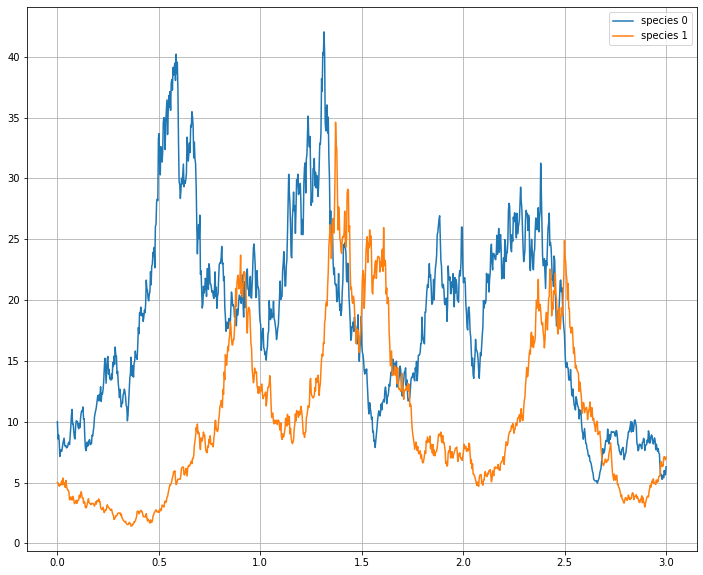

In [ ]:
vl.plot()

As we can see, at some point, population 1 (p1) becomes similar to population 0 (p0) scaled and shifted in time. This is an expected phenomenon: the high value of p0, due to the parameter $eats[1]$, leads to an increase in p1, which, in turn, causes a decrease in p0 due to the parameter $is_eaten[0]$.

So, the sequence of events can be described as follows:

p1 increases -> p0 decreases -> p1 decreases -> p0 increases -> p1 increases -> and so on.


We can also compare the obtained solution with a solution on a denser grid using the "test_versus_dense_grid" method. The method takes the following arguments:

1. $scheme$ - the scheme to be used.
2. $n$ - the density of the grid for the test solution.
3. $k$ - how many times denser the grid should be for creating the reference solution.

It is important to ensure that $n \cdot k$ is not greater than the previously declared number $N$ during the generation of increments. Additionally, we can provide the $error_kpi$ argument (default is "last"). In this case, the title of the plot will be the error, computed as the absolute difference of values at the last node for the "last" option, or the mean square relative error (MSRE) of values at the nodes for the "mean" option. You can also choose the "both" option to calculate both errors.

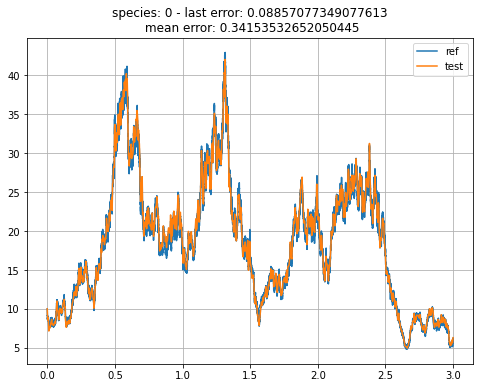

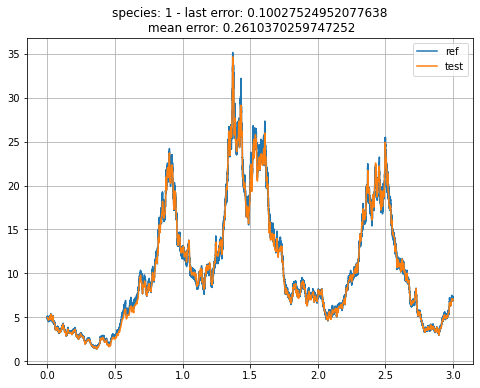

In [ ]:
vl.test_versus_dense_grid('Euler', 1000, 100, error_kpi = 'both')

There is also an option to examine the solution in a deterministic case by setting the covariance matrix to be a zero matrix. This can be achieved by providing a zero matrix as the input for the covariance matrix parameter.

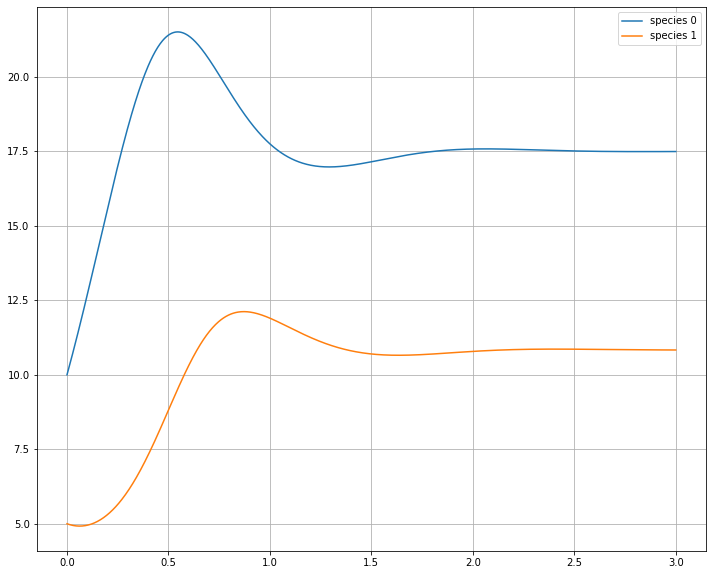

In [ ]:
sig2 = np.array([[0,0],          #The covariance matrix for generating the Wiener process
                 [0,0]])


vl_det = Volterra_Lotka(no_species, T, x0, mu, sig2, natural_growth, is_eaten, contests, eats)
vl_det.generate_increments(100000)
vl_det.solve('Euler', 1000)
vl_det.plot()

As we can see, the deterministic case is significantly calmer, and after a while, the populations stabilize. As mentioned before, this is not considered an advantage of the model. By introducing a random coefficient into the equations, we incorporate additional dependencies in a certain way.



Another drawback of the model was its generality. Population values can drop to arbitrarily low levels and then rise again. In practice, such a situation would indicate species extinction. The class implementation takes this phenomenon into account. We can use the enable_extinction method to consider the possibility of species extinction in the equation solving scheme. The method takes two arguments: a list of threshold values (thresholds) and coefficients (coef). If the population size of a species falls below a specific threshold value, its value in subsequent steps will asymptotically approach zero. More precisely, in each step, the value is divided by the specified coefficient raised to the power equal to the length of the step (thanks to this approach, the rate of decline is independent of the grid density).

/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')


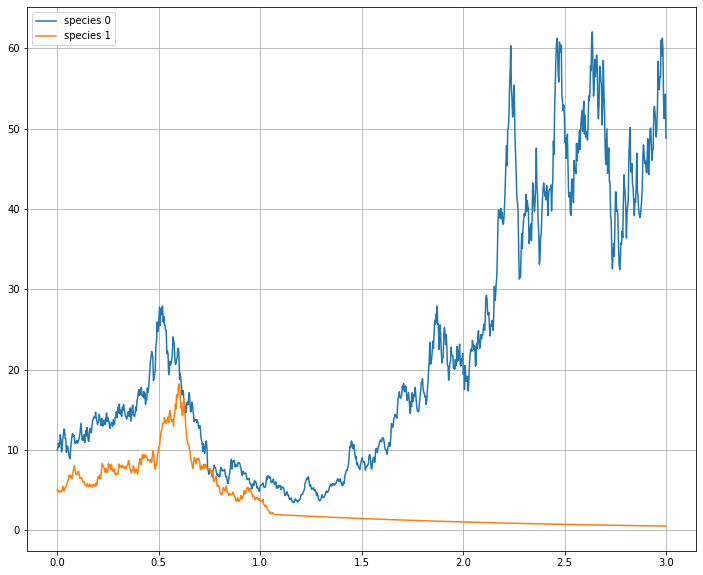

In [ ]:
vl.enable_extinction(thresholds = [0,2], coef = [1,2])
vl.generate_increments(100000)
vl.solve('Euler', 1000)
vl.plot()

We can learn several things from studying this case. In particular, an important piece of information is the species survivability coefficient in the model. To achieve this, we can use the check_survivability function. It takes the following arguments:

1. $scheme$ - the type of scheme used for estimating the solution,
2. $n$ - the density of the grid used by the scheme,
3. $trials$ - the number of trajectories to generate.

The method will display on the screen the percentage of trials survived by each species.

In [ ]:
 ratios = vl.check_survivability(scheme = 'Euler', n = 1000, trials = 100)

/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')


sepcies 0 survived 100.0% of times (100 out of 100 trials)
sepcies 1 survived 62.0% of times (62 out of 100 trials)



As we can see, for a survival threshold of 2, species 1 survived until the time horizon in 62% of the cases.

In [ ]:
vl.disable_extinction()

Another method of the class is the monte_carlo method, which, given a specific scheme scheme and density grid n, calculates the average trajectory from a specified number of trials trials and displays the confidence interval at a given level alpha (default is 0.95).

/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')


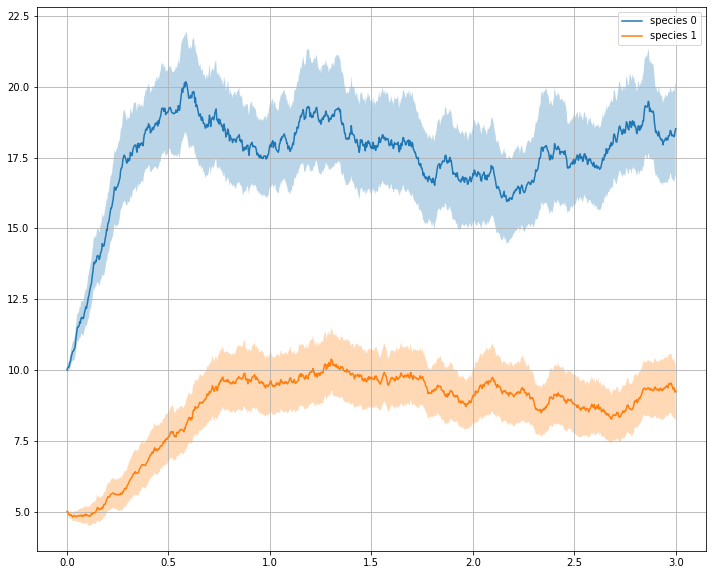

In [ ]:
xm = vl.monte_carlo(scheme = 'Euler', n = 1000, trials = 100, alpha = 0.95)

Certainly, the averaged solution will converge to the deterministic solution due to the nature of the process $\textbf{W}(t)$, but the confidence intervals can provide valuable information.

In the class, there are several other methods that were helpful in prototyping or simply turned out to be unsuccessful. For example, we have the function animation, which was intended to generate an animation illustrating the changes in population. The arguments for this method are:

1. scheme - the type of scheme.
2. n - the density of the grid for the scheme.
3. multiplier - a multiplier for the population value to determine the number of individuals.
4. frames - the number of animation frames (note that n should be divisible by frames).

In [ ]:
vl.animation(scheme = 'Euler', n = 1000, multiplier = 5, frames = 50)

The presentation of data in that format turned out to be unclear and ultimately unnecessary. The remaining methods will be presented in the next example.

### 3D example

We will consider an example for 3 species.

/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')


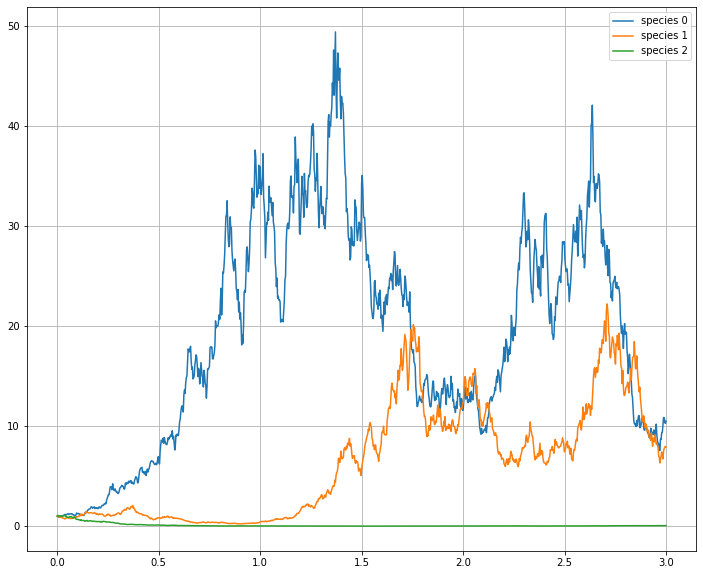

In [ ]:
no_species = 3                        # number of species
T = 3                                 # time horizon
x0 = [1,1,1]                          # initial populations


natural_growth = [5,-2,-2]            # natural growth rates
eats = [0,.3,.3]                      # influence of lower-ranked species
contests = [-.1,-.3, -.3]             # intraspecies competition coefficient
is_eaten = [-0.3,-0.3,-0.3]           # influence of higher-ranked species

mu = np.array([0,0,0])                # mean values for Wiener process generation
sig = np.array([[1,0,0],              # covariance matrix for Wiener process generation
                [0,1,0],
                [0,0,1]])


vl2 = Volterra_Lotka(no_species = no_species,
                    T = T, 
                    x0 =x0, 
                    mu = mu, 
                    sig = sig, 
                    natural_growth = natural_growth, 
                    is_eaten = is_eaten, 
                    contests = contests, 
                    eats = eats)
vl2.generate_increments(N = 100000)
vl2.solve('Milstein', n = 1000)
vl2.plot()

The translation of the method description:

Quite quickly, it turns out that for a larger number of species, finding parameter values such that none of the populations almost reach zero at the time horizon is quite challenging. Therefore, the class provides the method find_params. It takes the following parameters:

1. scheme - the scheme to be used
2. n - the grid density
3. start - the start of the search interval
4. stop - the end of the search interval
5. div - the number of points in the interval
6. threshold - the threshold value
7. max - the maximum value
8. trials - the number of trials

The method randomly selects parameters from the given interval, overwrites them in the class, solves the equations with the specified scheme, and then checks whether all populations at the time horizon are above the given threshold and below the specified maximum value for the entire trajectory. This algorithm is repeated a certain number of times, and in case of success, the parameters and the last population values are printed on the screen.

In [1]:
# takes a while so i left it commented :)
#vl2.find_params(scheme = 'Milstein', n = 1000, start = 0.5, stop = 5.0, div = 10,  min = 0.2, max = 10, trials = 3000)

In relation to the above method, a parameter overriding method has also been introduced by providing a dictionary.

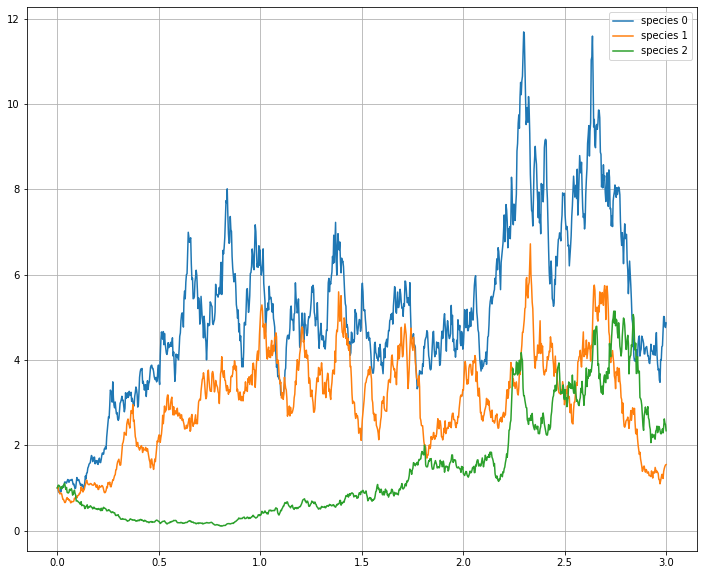

In [ ]:
d1 = {'natural_growth': [2.0, -1.0, -0.8], 'eats': [0, 1.6, 1.4], 'contests': [-0.2, -1.2, -0.2], 'is_eaten': [-0.2, -0.2, 0]}
d2 = {'natural_growth': [2.0, -0.2, -0.2], 'eats': [0, 1.8, 0.2], 'contests': [-0.4, -1.0, -0.8], 'is_eaten': [-0.2, -1.8, 0]}
d3 = {'natural_growth': [5.0, -1.0, -2.0], 'eats': [0, 4.5, 1.5], 'contests': [-0.5, -5.0, -1.0], 'is_eaten': [-0.5, -4.0, 0]}
d4 = {'natural_growth': [4.5, -0.5, -0.5], 'eats': [0, 3.0, 3.5], 'contests': [-1.0, -1.0, -2.0], 'is_eaten': [-0.5, -1.5, 0]}
d5 = {'natural_growth': [2.5, -4.5, -0.5], 'eats': [0, 5.0, 3.5], 'contests': [-0.5, -1.5, -1.0], 'is_eaten': [-2.0, -4.0, 0]}

vl2.set_params(d3)
vl2.solve('Milstein', n = 1000)
vl2.plot()

Let's check the error compared to the solution on a denser grid again.

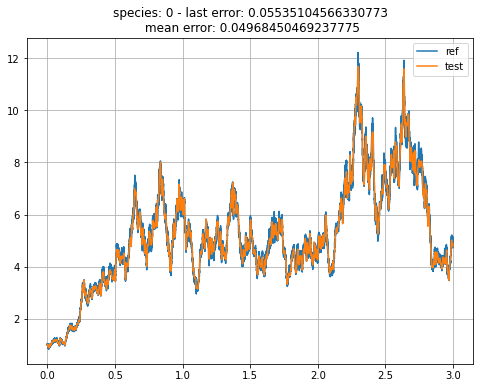

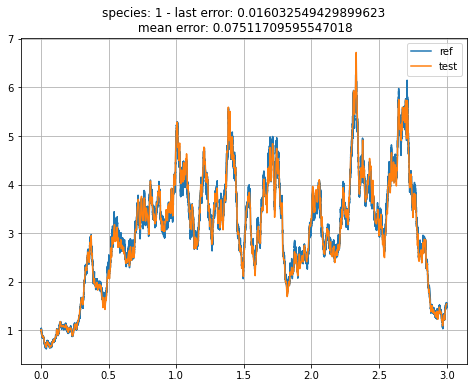

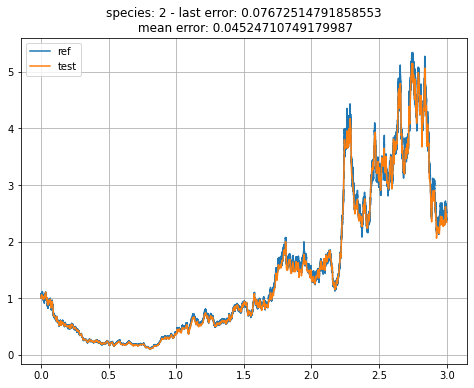

In [ ]:
vl2.test_versus_dense_grid('Milstein', 1000, 100, error_kpi = 'both')


Let's also check how the solution of the deterministic system looks like.

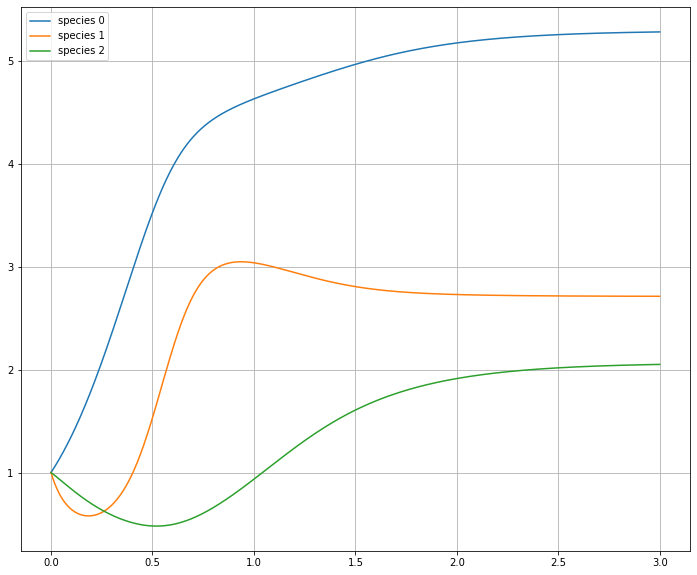

In [ ]:
sig2 = np.array([[0,0,0],          
                 [0,0,0],
                 [0,0,0]])


vl2_det = Volterra_Lotka(no_species, T, x0, mu, sig2, natural_growth, is_eaten, contests, eats)
vl2_det.set_params(d3)
vl2_det.generate_increments(100000)
vl2_det.solve('Milstein', 1000)
vl2_det.plot()

Let's see how the survival rates look like for thresholds at the level of 0.1.

In [ ]:
vl2.enable_extinction(thresholds = [0,0.1,0.1], coef = [2,2,2])
ratios = vl2.check_survivability(scheme = 'Milstein', n = 1000, trials = 100)

/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')


sepcies 0 survived 100.0% of times (100 out of 100 trials)
sepcies 1 survived 100.0% of times (100 out of 100 trials)
sepcies 2 survived 91.0% of times (91 out of 100 trials)


As we can see, only species 3 does not have a 100% survival rate.


/usr/local/lib/python3.7/dist-packages/cupy/random/_distributions.py:476: FutureWarning: cupy.random.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.multivariate_normal')
/usr/local/lib/python3.7/dist-packages/cupy/random/_generator.py:337: FutureWarning: cupy.random.RandomState.multivariate_normal is experimental. The interface can change in the future.
  _util.experimental('cupy.random.RandomState.multivariate_normal')


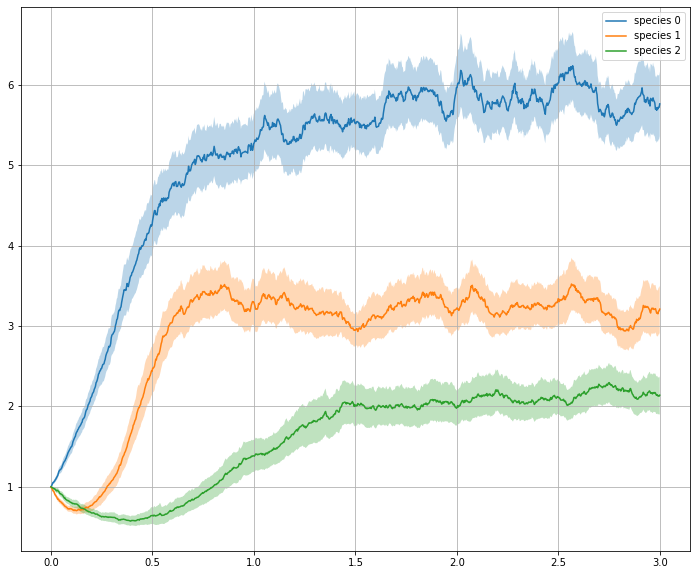

In [ ]:
vl2.disable_extinction()
xm = vl2.monte_carlo(scheme = 'Milstein', n = 1000, trials = 100)

In [ ]:
vl2.animation('Milstein', 1000, 10, 50)